/var/folders/_g/3_b9tp2s77d90vbdm5cnt_j00000gn/T/ipykernel_20972/2224402567.py:20: RuntimeWarning: divide by zero encountered in log
  ax[2].imshow(np.log(abs(ConvolveSquirrel)),cmap='gray')


MSE =  19.462874636819773


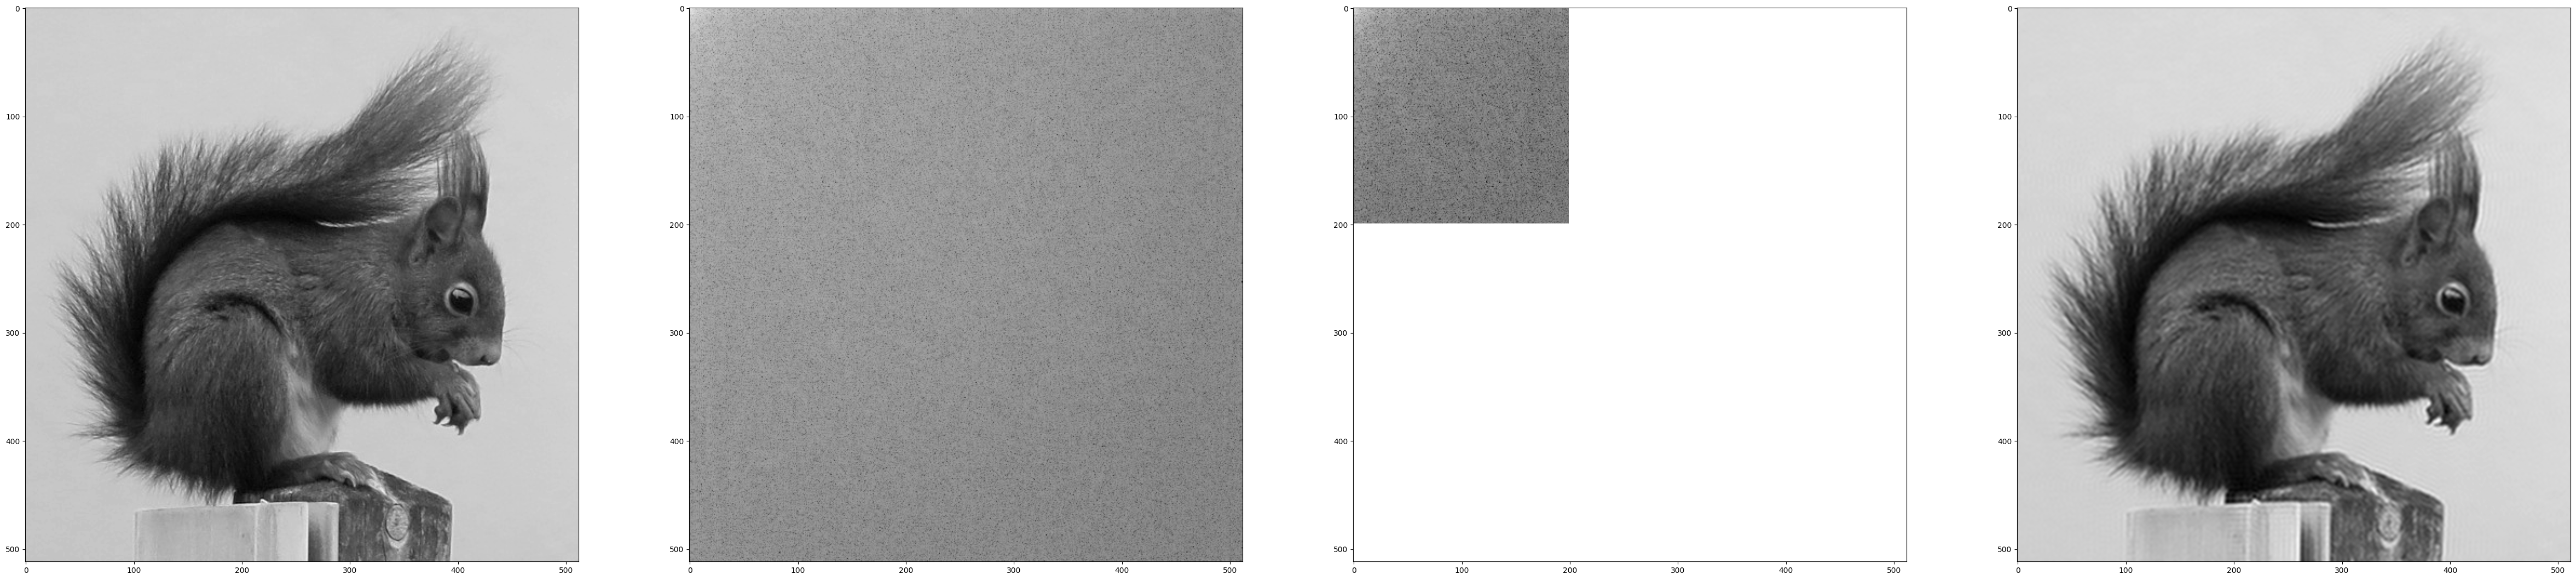

In [69]:
import skimage.io as io 
import matplotlib.pyplot as plt
import skimage as sk
import skimage.color as clr
import matplotlib as mat
import numpy as np
import scipy as sc
import glob


squirrel = io.imread('squirrel.png')
DCTSQ = sc.fftpack.dctn(squirrel,norm='ortho')
fig, ax = plt.subplots(1,4, figsize = (60,60))
ax[0].imshow(squirrel,cmap='gray')
ax[1].imshow(np.log(abs(DCTSQ)),cmap='gray') #On remarque une grande intensité dans les basses fréquences
Mask = np.zeros(DCTSQ.shape)
carre = 200
Mask[0:carre,0:carre] = 1
ConvolveSquirrel = Mask * DCTSQ
ax[2].imshow(np.log(abs(ConvolveSquirrel)),cmap='gray')
CompressSquirrel = sc.fftpack.idctn(ConvolveSquirrel,norm='ortho')
ax[3].imshow(CompressSquirrel,cmap='gray')
MSE = ((np.linalg.norm(squirrel-CompressSquirrel))**2)/(512**2)
print('MSE = ',MSE)

MSE90 =  1.0
MSE180 =  4.969823702892373e-31
MSE270 =  0.9999999999999996
MSE360 =  1.2937318845624588e-30


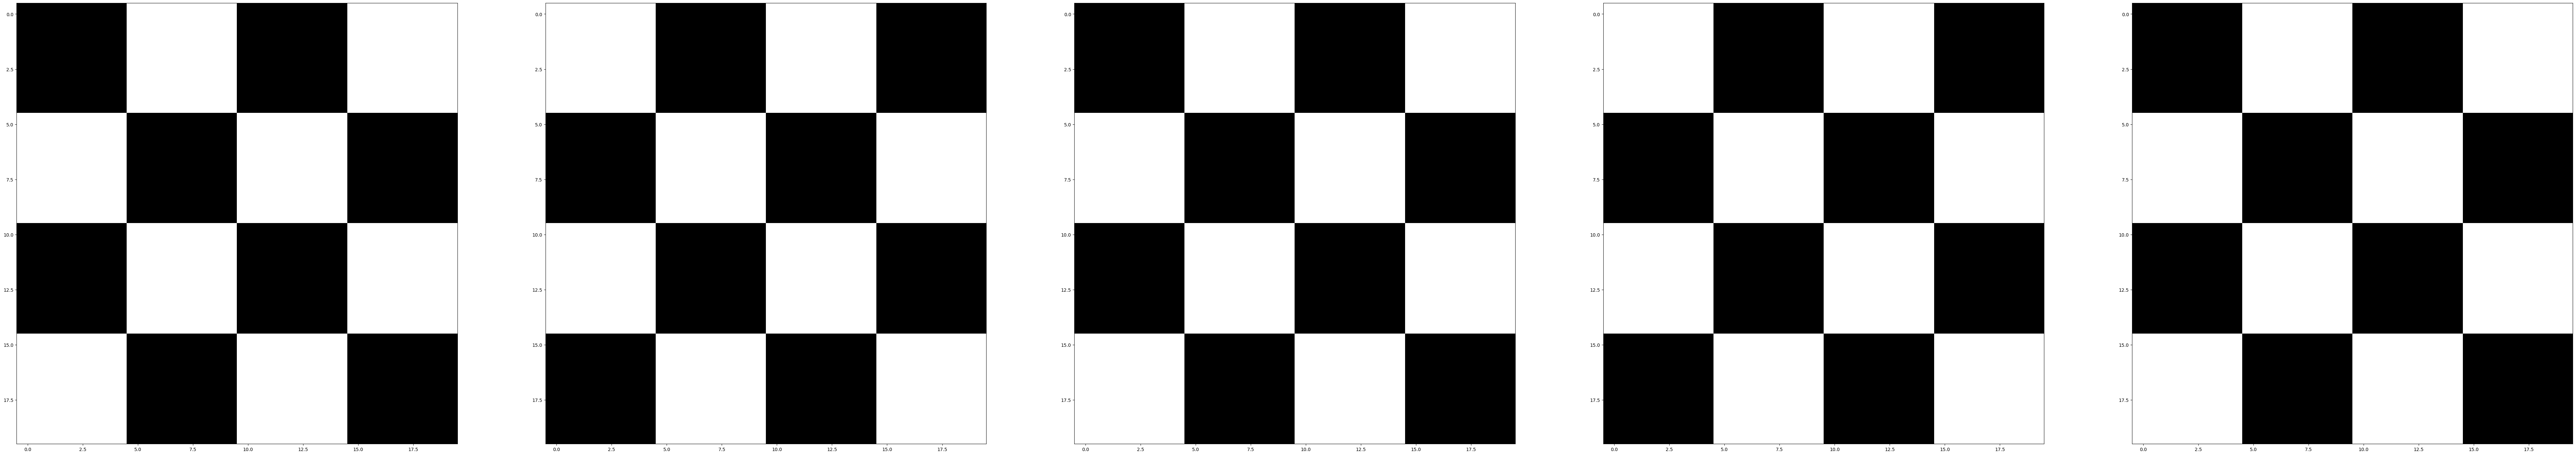

In [70]:
fig, ax = plt.subplots(1,5, figsize = (100,100))
chess= io.imread('chess.png')
chess = sk.util.img_as_float(chess)
ax[0].imshow(chess,cmap='gray')
chess90 = sk.transform.rotate(chess,90)
chess180  = sk.transform.rotate(chess90,90)
chess270 = sk.transform.rotate(chess180,90)
chess360 = sk.transform.rotate(chess270,90)
ax[1].imshow(chess90,cmap='gray')
ax[2].imshow(chess180,cmap='gray')
ax[3].imshow(chess270,cmap='gray')
ax[4].imshow(chess360,cmap='gray')
MSE90 = ((np.linalg.norm(chess-chess90))**2)/(chess.shape[1]*chess.shape[0])
MSE180 = ((np.linalg.norm(chess-chess180))**2)/(chess.shape[1]*chess.shape[0])
MSE270 = ((np.linalg.norm(chess-chess270))**2)/(chess.shape[1]*chess.shape[0])
MSE360 = ((np.linalg.norm(chess-chess360))**2)/(chess.shape[1]*chess.shape[0])
print('MSE90 = ',MSE90)
print('MSE180 = ',MSE180)
print('MSE270 = ',MSE270)
print('MSE360 = ',MSE360)


MSE 0 = 0.5220309371690078
MSE 40 = 0.5936590318328714
MSE 80 = 0.32050865920108107
MSE 120 = 0.3589780369684386
MSE 160 = 0.34643978981764995
MSE 200 = 0.31196739255922457
MSE 240 = 0.4890475953854523
MSE 280 = 0.37732400676927413
MSE 320 = 0.18370710281278735


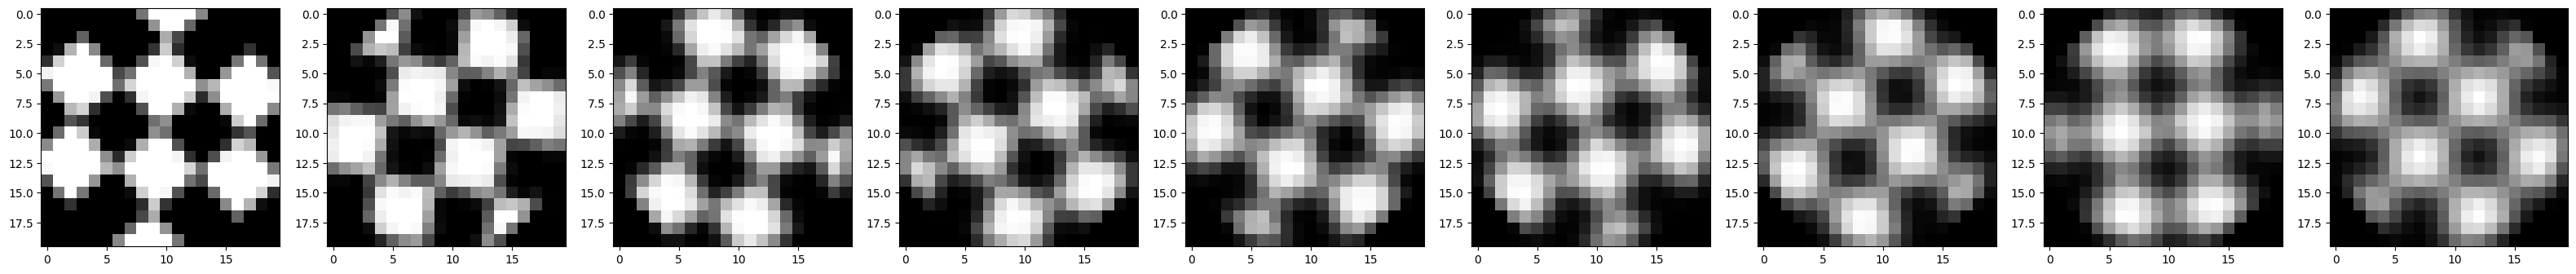

In [71]:

fig, ax = plt.subplots(1,9, figsize = (40,40))
newchess = chess
for i in range(9):
    chess40 = sk.transform.rotate(newchess,40)
    ax[i].imshow(chess40,cmap='gray')
    MSE40 = ((np.linalg.norm(chess-chess40))**2)/(chess.shape[1]*chess.shape[0])
    print('MSE', i*40, '=' ,MSE40)
    newchess = chess40
    